In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Reading Data

In [3]:
df = pd.read_csv("train.csv")

Understanding Data

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

Checking null values

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Drop these absolutely useless column with lots of nAn values

In [9]:
df = df.drop(columns=['Id', 'PoolQC', 'FireplaceQu'])

Categorizing Data into numerical and categorical

In [10]:
numerical_column=df.select_dtypes(include=['int64','float64']).columns
categorical_columns=df.select_dtypes(include=['object']).columns
print("Numerical Columns \n",numerical_column,"\n")
print("Categorical Columns \n",categorical_columns)

Numerical Columns 
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 

Categorical Columns 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1

Checking percentage of null values before Data Cleaning and Feature Engineering

In [11]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.shape[0]*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


,Total,Percent
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
LotFrontage,259,17.74
...,...,...
TotalBsmtSF,0,0.00
Heating,0,0.00
MSZoning,0,0.00
CentralAir,0,0.00


Checking diff values in Alley

In [12]:
df['Alley'].value_counts(dropna = False)

Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

Replacing Nan values with NA

In [13]:
df['Alley'].fillna('NA', inplace = True)

/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_3377/1494726707.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alley'].fillna('NA', inplace = True)


Checking diff values in Masonry veneer type

In [14]:
df['MasVnrType'].value_counts(dropna = False)

MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

Filling NaN values with mode

In [15]:
m = df['MasVnrType'].mode()[0]
df['MasVnrType'].fillna(m, inplace = True)

/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_3377/4196558824.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrType'].fillna(m, inplace = True)


Reconstructing all Basement related columns

In [16]:
#basement related fields with missing values
cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

#imputing 'NA' in place of NaN for the above columns where there is no basement
df.loc[df['TotalBsmtSF'] == 0, cols] = df.loc[df['TotalBsmtSF'] == 0, cols].fillna('NA')

Checking diff values in Electrical

In [17]:
df['Electrical'].value_counts(dropna = False)

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64

Filing nan values with mode

In [18]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)

/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_3377/804612581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)


Reconstructing all Garage related columns

In [19]:
#garage related fields with missing values
cols = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

#imputing 'NA' in place of NaN for the above columns where there is no basement
df.loc[df['GarageArea'] == 0, cols] = df.loc[df['GarageArea'] == 0, cols].fillna('NA')

/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_3377/133794807.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA'
 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA'
 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA'
 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA'
 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA'
 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA' 'NA']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['GarageArea'] == 0, cols] = df.loc[df['GarageArea'] == 0, cols].fillna('NA')


Filling NaN values of fence with NA

In [20]:
df['Fence'].fillna('NA', inplace = True)

/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_3377/744867289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fence'].fillna('NA', inplace = True)


Checking diff values in Miscellaneous

In [21]:
df['MiscFeature'].value_counts(dropna = False)

MiscFeature
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

Changing the MiscFeature to Shed/ No Shed

In [22]:
df['MiscFeature'] = df['MiscFeature'].map(lambda x: 1 if x == 'Shed' else 0)

df = df.rename(columns = {'MiscFeature': 'Shed'})
df['Shed'].value_counts()

Shed
0    1411
1      49
Name: count, dtype: int64

Renaming MiscFeature to Shed

In [23]:
df = df.rename(columns = {'MiscVal': 'ShedVal'})

checking pending null values to better clean the dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Replacing NA in LotFrontage with 0 as all other vlues are numericals

In [25]:
df['LotFrontage'].replace('NA',0, inplace = True)

/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_3377/2394256573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].replace('NA',0, inplace = True)


Checking diff values in LotFrontage

In [26]:
df['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

If Street is Paved then it is 1 else 0

In [27]:
df['Street'] = df['Street'].apply(lambda x: 1 if x == 'Pave' else 0)

If Alley exists then it is 1 else 0

In [28]:
df['Alley'] = df['Alley'].apply(lambda x: 1 if x == 'NA' else 0)

In [29]:
#Convert CentralAir to binary (Y=1, N=0)
df['CentralAir'] = df['CentralAir'].map({'Y': 1, 'N': 0})

#Convert Utilities to binary (AllPub=1, No=0)
df['Utilities'] = df['Utilities'].map({'AllPub': 1, 'No': 0})

#Convert BsmtCond to binary (TA=1, Fa=0)
df['BsmtCond'] = df['BsmtCond'].map({'TA': 1, 'Fa': 0})

#Convert BsmtExposure to binary (Gd=1, No=0)
df['BsmtExposure'] = df['BsmtExposure'].map({'Gd': 1, 'No': 0})

Creating column to store Age of house and when it was renovated

In [30]:
from datetime import datetime 
#Create Age Features
current_year = datetime.now().year
df['HouseAge'] = current_year - df['YearBuilt']
df['RemodAge'] = current_year - df['YearRemodAdd']

Create Time Since Sold feature

In [31]:
df['YearsSinceSold'] = current_year - df['YrSold']

print(df[['CentralAir', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'HouseAge', 'RemodAge', 'YearsSinceSold']].head())

   CentralAir  YearBuilt  YearRemodAdd  YrSold  HouseAge  RemodAge  \
0           1       2003          2003    2008        22        22   
1           1       1976          1976    2007        49        49   
2           1       2001          2002    2008        24        23   
3           1       1915          1970    2006       110        55   
4           1       2000          2000    2008        25        25   

   YearsSinceSold  
0              17  
1              18  
2              17  
3              19  
4              17  


Creating TotalBath by summing full and half baths

In [32]:
df['TotalBath'] = (df['FullBath'] + 
                  0.5 * df['HalfBath'] + 
                  df['BsmtFullBath'] + 
                  0.5 * df['BsmtHalfBath'])

Ordinal Encoding

In [33]:
# Quality/Condition mappings
quality_map = {
    'Ex': 5, 
    'Gd': 4, 
    'TA': 3, 
    'Fa': 2, 
    'Po': 1, 
    'NA': 0, 
    'None': 0
}

# Apply to quality/condition columns
quality_cols = [
    'ExterQual', 'ExterCond', 
    'BsmtQual', 'BsmtCond', 
    'HeatingQC', 
    'KitchenQual', 
    'FireplaceQu', 
    'GarageQual', 'GarageCond', 
    'PoolQC'
]

for col in quality_cols:
    if col in df.columns:
        df[col] = df[col].map(quality_map).fillna(0).astype(int)

# GarageFinish mapping
garage_finish_map = {
    'Fin': 3,
    'RFn': 2,
    'Unf': 1,
    'None': 0,
    'NA': 0
}

if 'GarageFinish' in df.columns:
    df['GarageFinish'] = df['GarageFinish'].map(garage_finish_map).fillna(0).astype(int)

# Additional ordinal features
bsmt_exposure_map = {
    'Gd': 4,
    'Av': 3,
    'Mn': 2,
    'No': 1,
    'NA': 0,
    'None': 0
}

bsmt_fin_type_map = {
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'NA': 0,
    'None': 0
}

functional_map = {
    'Typ': 8,
    'Min1': 7,
    'Min2': 6,
    'Mod': 5,
    'Maj1': 4,
    'Maj2': 3,
    'Sev': 2,
    'Sal': 1,
    'NA': 0
}

# Apply additional mappings
if 'BsmtExposure' in df.columns:
    df['BsmtExposure'] = df['BsmtExposure'].map(bsmt_exposure_map).fillna(0).astype(int)

bsmt_fin_cols = ['BsmtFinType1', 'BsmtFinType2']
for col in bsmt_fin_cols:
    if col in df.columns:
        df[col] = df[col].map(bsmt_fin_type_map).fillna(0).astype(int)

if 'Functional' in df.columns:
    df['Functional'] = df['Functional'].map(functional_map).fillna(0).astype(int)

In [34]:
print(df[['ExterQual', 'KitchenQual', 'GarageFinish', 'BsmtExposure', 'BsmtFinType1', 'Functional']])

      ExterQual  KitchenQual  GarageFinish  BsmtExposure  BsmtFinType1  \
0             4            4             2             0             6   
1             3            3             2             0             5   
2             4            4             2             0             6   
3             3            4             1             0             5   
4             4            4             2             0             6   
...         ...          ...           ...           ...           ...   
1455          3            3             2             0             1   
1456          3            3             1             0             5   
1457          5            4             2             0             6   
1458          3            4             1             0             6   
1459          4            3             3             0             4   

      Functional  
0              8  
1              8  
2              8  
3              8  
4              8

In [35]:
#Convert columns to categorical
categorical_cols = ['MoSold', 'YrSold', 'MSSubClass', 'OverallQual', 'OverallCond']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

Multiplyin co-realted columns

In [36]:
if '1stFlrSF' in df.columns and '2ndFlrSF' in df.columns and 'TotalBsmtSF' in df.columns:
    df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

df['TotalSF_OverallQual'] = df['TotalSF'] * df['OverallQual'].astype('int')
df['GarageCars_Area'] = df['GarageCars'] * df['GarageArea']
df['TotalBath_GrLivArea'] = df['TotalBath'] * df['GrLivArea']

print("New columns created:")
print(df[['TotalSF', 'TotalSF_OverallQual', 'GarageCars_Area', 'TotalBath_GrLivArea']].head())

New columns created:
   TotalSF  TotalSF_OverallQual  GarageCars_Area  TotalBath_GrLivArea
0     2566                17962             1096               5985.0
1     2524                15144              920               3155.0
2     2706                18942             1216               6251.0
3     2473                17311             1926               3434.0
4     3343                26744             2508               7693.0


In [37]:
cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 
        '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'GrLivArea',
        'TotalSF', 'SalePrice'] 

ValueError: num must be an integer with 1 <= num <= 10, not 11

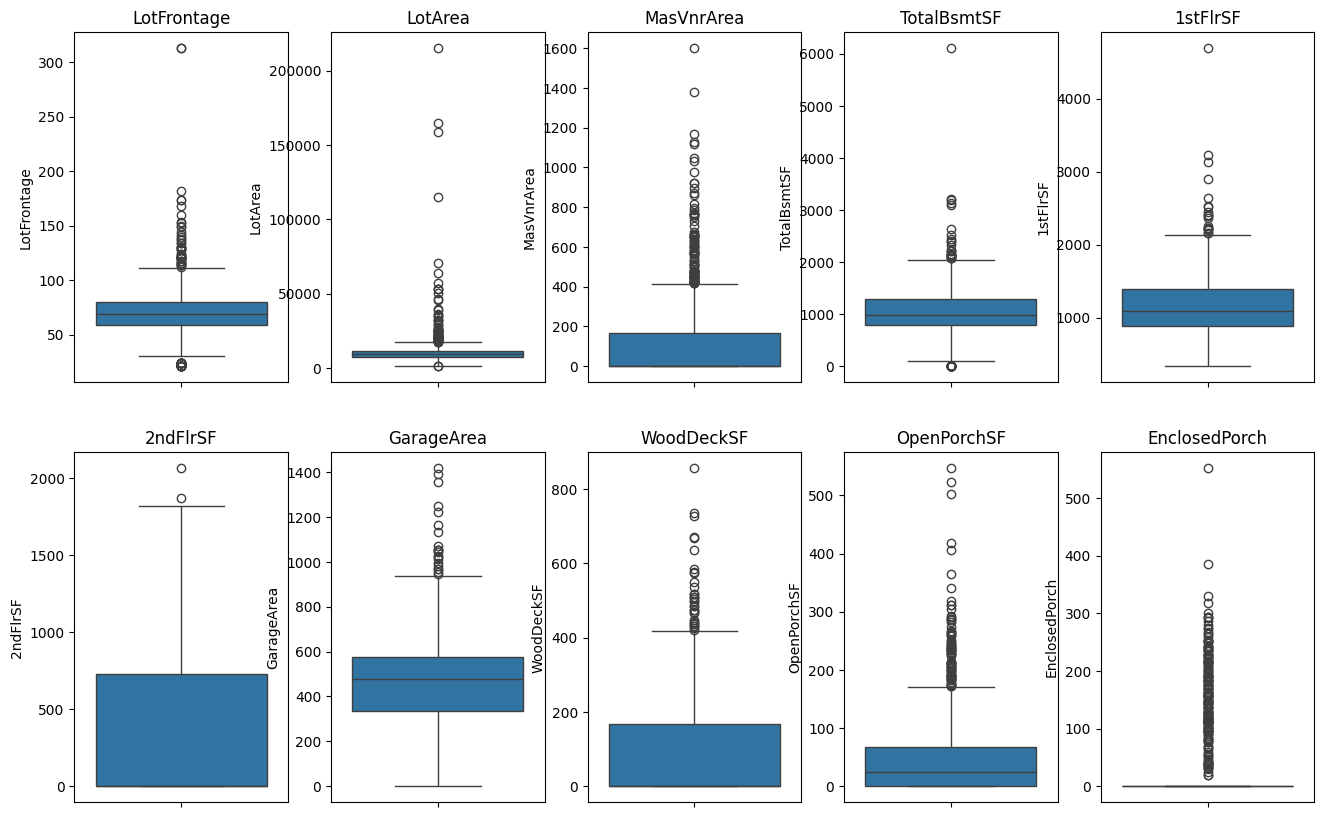

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['LotFrontage', 'LotArea', 'MasVnrArea',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

plt.figure(figsize=(16, 10))

for i, col in enumerate(cols):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
def calculate_upper_limits(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return Q3 + 1.5 * IQR

# Calculate upper limits
ul_LotArea = calculate_upper_limits(df, "LotArea")
ul_LotFrontage = calculate_upper_limits(df, "LotFrontage")
ul_1stFlrSF = calculate_upper_limits(df, "1stFlrSF")
ul_MasVnrArea = calculate_upper_limits(df, "MasVnrArea")
ul_TotalBsmtSF = calculate_upper_limits(df, "TotalBsmtSF")
ul_WoodDeckSF = calculate_upper_limits(df, "WoodDeckSF")
ul_OpenPorchSF = calculate_upper_limits(df, "OpenPorchSF")

# Apply filter to remove outliers
df_cleaned = df[~((df["LotArea"] > ul_LotArea) |
                  (df["LotFrontage"] > ul_LotFrontage) |
                  (df["1stFlrSF"] > ul_1stFlrSF) |
                  (df["MasVnrArea"] > ul_MasVnrArea) |
                  (df["TotalBsmtSF"] > ul_TotalBsmtSF) |
                  (df["WoodDeckSF"] > ul_WoodDeckSF) |
                  (df["OpenPorchSF"] > ul_OpenPorchSF))]

In [ ]:
cols = ["LotArea", "LotFrontage", "1stFlrSF", 
        "MasVnrArea", "TotalBsmtSF", "WoodDeckSF", "OpenPorchSF"]


plt.figure(figsize=(16, 8))
for i, col in enumerate(cols):
    plt.subplot(2, 4, i + 1)  # 2 rows, 4 cols grid
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'After - {col}')

plt.tight_layout()
plt.show()

In [ ]:
df.shape

In [ ]:
categorical_columns = df.select_dtypes(exclude=np.number).columns

plt.figure(figsize=(20, 34))
for i, col in enumerate(categorical_columns):
    plt.subplot(11, 4, i+1)
    sns.boxplot(x=df[col], y=df['SalePrice'])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
numerical_column = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 34))
for i, col in enumerate(numerical_column):
    plt.subplot(11, 4, i+1)
    sns.boxplot(x=df[col], y=df['SalePrice'])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Select numeric columns excluding SalePrice
num_cols = [col for col in df.select_dtypes(include=np.number).columns if col != 'SalePrice']

# Create subplots grid
rows = (len(num_cols) // 4) + 1  # 4 columns per row
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 4))  # dynamic height

axes = axes.flatten()  # flatten 2D array of axes

for i, col in enumerate(num_cols):
    axes[i].scatter(df[col], df['SalePrice'], alpha=0.6)
    axes[i].set_title(f"{col} vs SalePrice", fontsize=10)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel("SalePrice", fontsize=8)

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix only on numeric columns
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(22, 18))

sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    cmap="Reds", 
    linewidths=0.3, 
    linecolor="white",
    cbar_kws={
        "orientation": "vertical",
        "shrink": 0.8,
        "pad": 0.02,
        "aspect": 30
    }
)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.title("Correlation Heatmap of Numerical Features", fontsize=18, pad=20)
plt.show()

**To Do**

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularization in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

3. Also, determine the optimal value of lambda for ridge and lasso regression.

Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [ ]:
# --- Corrected Visualization of Target Variable ---
plt.figure(figsize=[18, 6])
# Plot original SalePrice
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True, stat="density", linewidth=0)
# Fit a normal distribution to the data
mu, std = norm.fit(df['SalePrice'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

In [ ]:
df['SalePrice'] = np.log1p(df['SalePrice'])

In [ ]:
plt.subplot(1, 2, 2)
log_saleprice = np.log1p(df['SalePrice']) # Use log1p for stability
sns.histplot(log_saleprice, kde=True, stat="density", linewidth=0)
# Fit a normal distribution to the transformed data
mu, std = norm.fit(log_saleprice)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.ylabel('Frequency')
plt.title('Log(SalePrice) Distribution')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# 2. Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Identify the true numerical columns to scale.
cols_to_scale = [col for col in X_train.columns if col in numerical_column and col != 'SalePrice']

scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])

# 6. Transform both the training and testing sets using the fitted scaler
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("Scaled X_train head:")
print(X_train.head())

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
'''
1. first, identify remaining categorical columns
categorical_columns = x_train.select_dtypes(include=['object', 'category']).columns
print("remaining categorical columns:", categorical_columns)

# 2. Use one-hot encoding for remaining categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# 3. Ensure X_test has same columns as X_train
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# 4. Now try fitting the models
ridge_cv = RidgeCV(
    alphas=np.logspace(-3, 2, 100),
    cv=5
)
ridge_cv.fit(X_train, y_train)

lasso_cv = LassoCV(
    alphas=np.logspace(-4, -1, 100),
    cv=5,
    random_state=42,
    max_iter=10000
)
lasso_cv.fit(X_train, y_train)

print("\n--- Optimal Lambda Values ---")
print(f"Optimal Lambda for Ridge Regression: {ridge_cv.alpha_:.4f}")
print(f"Optimal Lambda for Lasso Regression: {lasso_cv.alpha_:.4f}")

# 5. Print feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Ridge_Importance': abs(ridge_cv.coef_),
    'Lasso_Importance': abs(lasso_cv.coef_)
})

print("\nTop 10 Most Important Features:")
print(feature_importance.sort_values('Ridge_Importance', ascending=False).head(10))
'''

ValueError: Input X contains NaN.

Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values



In [ ]:
#First check remaining NaN values
print("Columns with NaN values:")
print(X_train.isna().sum()[X_train.isna().sum() > 0])

In [ ]:
#Handle NaN values in numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
# Fill NaN with median for numerical columns
    X_train[col] = X_train[col].fillna(X_train[col].median())
    X_test[col] = X_test[col].fillna(X_train[col].median())  

In [ ]:
#Handle NaN values in categorical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    # Fill NaN with mode for categorical columns
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    X_test[col] = X_test[col].fillna(X_train[col].mode()[0])

In [ ]:
#Verify there are no NaNs left
print("\nRemaining NaN values after imputation:")
print("Training set:", X_train.isna().sum().sum())
print("Test set:", X_test.isna().sum().sum())

In [ ]:
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

In [ ]:
#Ensure X_test has same columns as X_train
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [ ]:
ridge_cv = RidgeCV( alphas=np.logspace(-3, 2, 100), cv=5)
ridge_cv.fit(X_train, y_train)

lasso_cv = LassoCV( alphas=np.logspace(-4, -1, 100), cv=5,
    random_state=42, max_iter=10000)
lasso_cv.fit(X_train, y_train)

In [ ]:
print(f"Lambda for Ridge Regression: {ridge_cv.alpha_:.4f}")
print(f"Lambda for Lasso Regression: {lasso_cv.alpha_:.4f}")

In [ ]:
def print_model_performance(model, X_train, X_test, y_train, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f"\n{model_name} Performance:")
    print(f"Training R2: {train_r2:.4f}")
    print(f"Testing R2: {test_r2:.4f}")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Testing RMSE: {test_rmse:.4f}")

print_model_performance(ridge_cv, X_train, X_test, y_train, y_test, "Ridge")
print_model_performance(lasso_cv, X_train, X_test, y_train, y_test, "Lasso")

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Ridge_Importance': abs(ridge_cv.coef_),
    'Lasso_Importance': abs(lasso_cv.coef_)
})

print("\nTop 10 Most Important Features:")
print(feature_importance.sort_values('Ridge_Importance', ascending=False).head(10))

In [ ]:
plt.figure(figsize=(12, 6))
top_features = feature_importance.nlargest(10, 'Ridge_Importance')
sns.barplot(data=top_features, x='Ridge_Importance', y='Feature')
plt.title('Top 10 Most Important Features (Ridge Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
top_features = feature_importance.nlargest(10, 'Lasso_Importance')
sns.barplot(data=top_features, x='Lasso_Importance', y='Feature')
plt.title('Top 10 Most Important Features (Lasso Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [ ]:
train_r2 = r2_score(y_train, y_train_pred_lr)
test_r2 = r2_score(y_test, y_test_pred_lr)

Training set plot

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_lr, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Linear Regression (Training)\nR² = {train_r2:.4f}')

Test set plot

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Linear Regression (Test)\nR² = {test_r2:.4f}')

In [ ]:
print("\nLinear Regression Performance:")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_lr)):.4f}")
print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_lr)):.4f}")

FIX FOR LINEAR REGRESSION : 
-(